<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------


$S = \int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} \int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} |\beta^2 \cos v| \, du \, dv$





-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


C:\Users\Brian\AppData\Local\Temp/ipykernel_7412/672247081.py:35: RuntimeWarning: invalid value encountered in sqrt
  e = np.sqrt(1 - (beta**2) / (c**2))


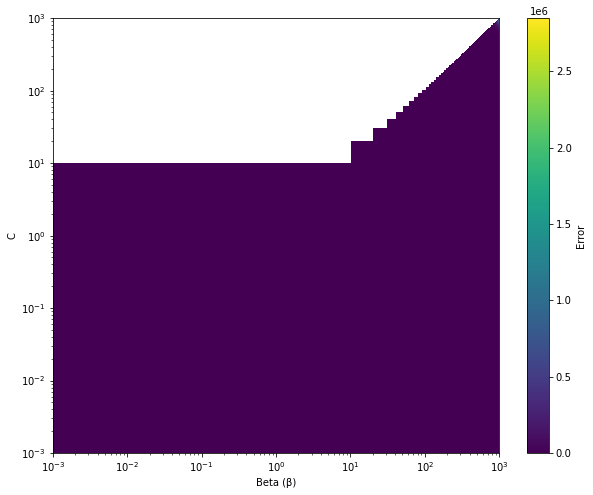

Area formula: 6283185.307179586
midpoint rule: 6.283443700256735
quadrature: 6283185.307179586
Estimated error: 1.743934249004316e-14


'--------------------Write your code above this line------------------------------'

In [122]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
from scipy import integrate

def f(u, v, beta):
    return abs(beta**2 * np.cos(v))

u_lower, u_upper = -np.pi/2, np.pi/2
v_lower, v_upper = -np.pi/2, np.pi/2
num_u_subs = 100
num_v_subs = 100

du = (u_upper - u_lower) / num_u_subs
dv = (v_upper - v_lower) / num_v_subs

area = 0

for i in range(num_u_subs):
    for j in range(num_v_subs):
        u_mid = u_lower + (i + 0.5) * du
        v_mid = v_lower + (j + 0.5) * dv
        area += f(u_mid, v_mid, beta=1) * du * dv 



num_nodes_u = 5
num_nodes_v = 5 

result, error = integrate.nquad(f, [[u_lower, u_upper], [v_lower, v_upper]], args=(1,),
                                opts={'epsabs': 1e-8, 'epsrel': 1e-8})



def ellipsoid_surface_area(beta, c):
    e = np.sqrt(1 - (beta**2) / (c**2))
    area = 2 * np.pi * beta**2 * (1 + c / beta * e * np.arcsin(e))
    return area

# beta = 1 
# c = 1    

beta_values = np.logspace(-3, 3, 100)
c_values = np.logspace(-3, 3, 100)

errors = np.zeros((len(beta_values), len(c_values)))



result, error = integrate.nquad(f, [[-np.pi/2, np.pi/2], [-np.pi/2, np.pi/2]], args=(beta,),
                                opts={'epsabs': 1e-8, 'epsrel': 1e-8})


for i, beta in enumerate(beta_values):
    for j, c in enumerate(c_values):
        result, _ = integrate.nquad(f, [[-np.pi/2, np.pi/2], [-np.pi/2, np.pi/2]], args=(beta,),
                                    opts={'epsabs': 1e-8, 'epsrel': 1e-8})
        formula_area = ellipsoid_surface_area(beta, c)
        errors[i, j] = abs(result - formula_area)

plt.figure(figsize=(10, 8))
plt.imshow(errors, extent=[0.001, 1000, 0.001, 1000], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Beta (β)')
plt.ylabel('C')
plt.show()


formula_area = ellipsoid_surface_area(beta, c)

print("Area formula:", formula_area)



print("midpoint rule:", area)
print("quadrature:", result)
print("Estimated error:", error)




'''--------------------Write your code above this line------------------------------'''

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



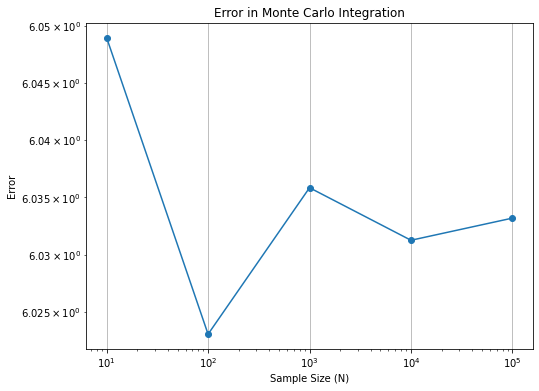

'--------------------Write your code above this line------------------------------'

In [121]:
'''--------------------Write your code below this line------------------------------'''



def f(x, beta):
    return abs(beta**2 * np.cos(x))

def ell_surface_area(beta, c):
    e = np.sqrt(1 - (beta**2) / (c**2))
    area = 2 * np.pi * beta**2 * (1 + c / beta * e * np.arcsin(e))
    return area

beta = 0.5
c = 1

true_area = ell_surface_area(2*beta, c)

sample_sizes = [10, 100, 1000, 10000, 100000]

errors = []
for N in sample_sizes:
    X = np.random.uniform(-np.pi/2, np.pi/2, N)
    approx_area = (np.pi/2) * np.mean(f(X, beta))
    error = abs(approx_area - true_area)
    errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Error in Monte Carlo Integration')
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



No handles with labels found to put in legend.


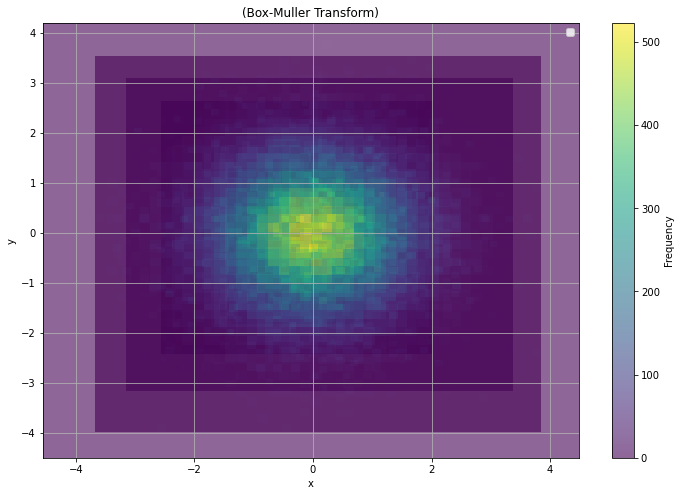

'--------------------Write your code above this line------------------------------'

In [128]:
'''--------------------Write your code below this line------------------------------'''

def box_muller(sigma, n):
    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)
    
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    R = sigma * np.sqrt(z1**2 + z2**2)
    
    theta = np.random.uniform(0, 2 * np.pi, n)
    
    return theta, R

sigma = 1

sample_sizes = [10, 100, 1000, 10000, 100000]

plt.figure(figsize=(12, 8))
for N in sample_sizes:
    theta, R = box_muller_rayleigh(sigma, N)
    
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    
    plt.hist2d(x, y, bins=50, cmap='viridis', alpha=0.6, label=f'N={N}')

plt.colorbar(label='Frequency')
plt.title('(Box-Muller Transform)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





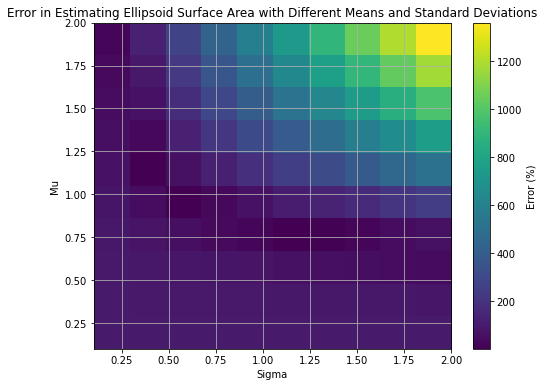

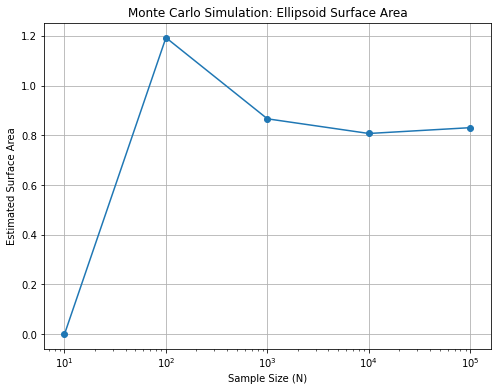

'--------------------Write your code above this line------------------------------'

In [137]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def ellipsoid_surface(x, y, z, beta, c):
    return (x**2 + y**2) / beta**2 + z**2 / c**2

def monte_carlo_ellipsoid_surface_area(num_points, beta, c):
    count_inside = 0
    for _ in range(num_points):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        z = np.random.uniform(-c, c)
        
        if ellipsoid_surface(x, y, z, beta, c) <= 1:
            count_inside += 1
    
    ratio = count_inside / num_points
    
    volume_bounding_box = 4 * beta * 2 * 2 * c
    estimated_volume = ratio * volume_bounding_box
    
    estimated_surface_area = 4 * np.pi * beta * c * ratio
    
    return estimated_surface_area

def calculate_error(estimated, true):
    return abs(estimated - true) / true * 100

beta = 0.5
c = 0.5

N = 10000

mus = np.linspace(0.1, 2, 10) 
sigmas = np.linspace(0.1, 2, 10) 

errors = np.zeros((len(mus), len(sigmas)))
for i, mu in enumerate(mus):
    for j, sigma in enumerate(sigmas):
        estimated_area = monte_carlo_ellipsoid_surface_area(N, mu, sigma)
        true_area = 4 * np.pi * beta * c
        errors[i, j] = calculate_error(estimated_area, true_area)

# Plotting the errors
plt.figure(figsize=(8, 6))
plt.imshow(errors, extent=[0.1, 2, 0.1, 2], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Error (%)')
plt.xlabel('Sigma')
plt.ylabel('Mu')
plt.title('Error in Estimating Ellipsoid Surface Area with Different Means and Standard Deviations')
plt.grid(True)
plt.show()


beta = 0.5
c = 1

sample_sizes = [10, 100, 1000, 10000, 100000]

estimated_areas = []
for N in sample_sizes:
    estimated_area = monte_carlo_ellipsoid_surface_area(N, beta, c)
    estimated_areas.append(estimated_area)

plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, estimated_areas, marker='o')
plt.xscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Estimated Surface Area')
plt.title('Monte Carlo Simulation: Ellipsoid Surface Area')
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

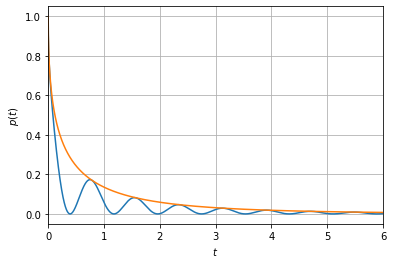

In [6]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



C:\Users\Brian\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


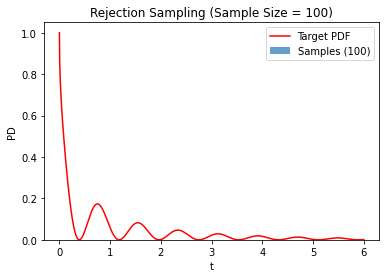

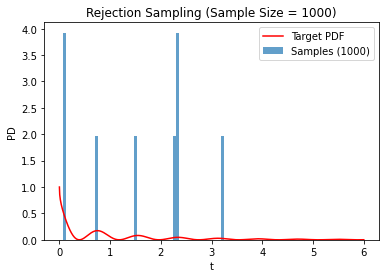

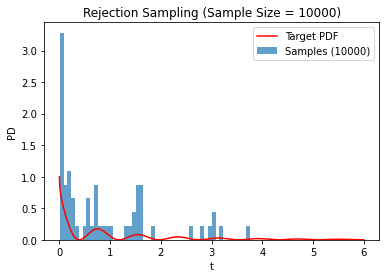

[[5.76750391e-02]
 [3.95163788e-02]
 [3.92822114e+00]
 [7.82540693e-01]
 [2.32218680e-01]
 [5.56208489e-02]
 [1.45562178e+00]
 [3.19303778e-02]
 [1.59906374e+00]
 [3.79321946e-02]
 [2.37670664e+00]
 [7.50269672e-01]
 [5.19873299e-02]
 [2.84425546e-03]
 [2.37490678e-02]
 [6.93946004e-01]
 [4.55795414e+00]
 [5.29390136e-01]
 [1.72692005e-01]
 [3.12902698e+00]
 [2.26510974e+00]
 [5.37983385e-01]
 [5.37995267e+00]
 [1.20248264e-01]
 [1.20472022e-01]
 [1.02674989e-02]
 [1.26359005e-01]
 [4.90797046e-02]
 [2.79336852e-02]
 [2.31040233e+00]
 [1.53636322e-01]
 [6.87710826e-01]
 [3.62703311e+00]
 [6.65447637e-01]
 [6.52524924e-01]
 [7.81144394e-01]
 [1.07327697e-01]
 [1.82479566e-01]
 [1.56022095e+00]
 [1.90795695e-01]
 [7.89069124e-01]
 [5.42001159e-01]
 [1.31365467e+00]
 [5.27823168e-02]
 [1.00869709e+00]
 [1.31150133e+00]
 [1.89064007e-01]
 [9.02541228e-02]
 [9.41716241e-02]
 [4.04294461e+00]]


'--------------------Write your code above this line------------------------------'

In [34]:
'''--------------------Write your code below this line------------------------------'''
def pdf(t):
    return np.exp(-2*np.sqrt(t))*np.cos(4*t)**2

def uniform_pro(min_val, max_val, size = 1):
    return np.random.uniform(min_val, max_val, size)

#portion for selectiong t_f

def rejection_sampling(min_val, max_val, num_samples):
    samples = []
    for _ in range(num_samples):
        proposed_sample = uniform_pro(min_val, max_val)
        accept = pdf(proposed_sample) / (max_val - min_val)
        if np.random.uniform(0, 1) < accept:
            samples.append(proposed_sample)
    return np.array(samples)



min_val = 0
max_val = 6


N_values = [100, 1000, 10000]  
for N in N_values:
    accepted_samples = rejection_sampling(min_val, max_val, N)
    plt.figure()
    plt.hist(accepted_samples, bins=50, density=True, alpha=0.7, label=f'Samples ({N})')
    t_vals = np.linspace(min_val, max_val, 1000)
    plt.plot(t_vals, pdf(t_vals), 'r', label='Target PDF')
    plt.xlabel('t')
    plt.ylabel('PD')
    plt.title(f'Rejection Sampling (Sample Size = {N})')
    plt.legend()

plt.show()

print(np.array(samples))

'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


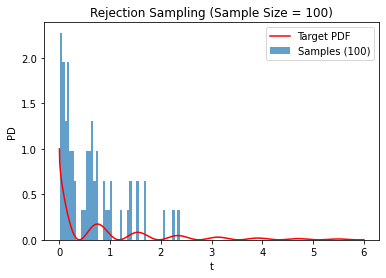

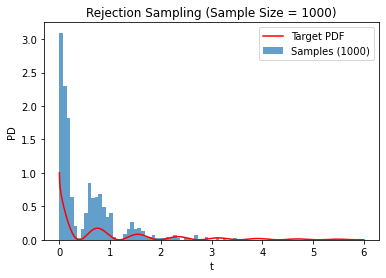

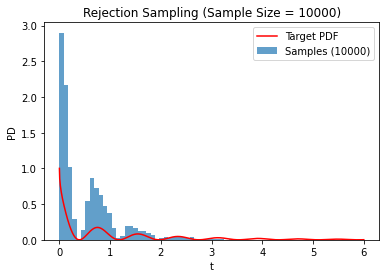

[[5.76750391e-02]
 [3.95163788e-02]
 [3.92822114e+00]
 [7.82540693e-01]
 [2.32218680e-01]
 [5.56208489e-02]
 [1.45562178e+00]
 [3.19303778e-02]
 [1.59906374e+00]
 [3.79321946e-02]
 [2.37670664e+00]
 [7.50269672e-01]
 [5.19873299e-02]
 [2.84425546e-03]
 [2.37490678e-02]
 [6.93946004e-01]
 [4.55795414e+00]
 [5.29390136e-01]
 [1.72692005e-01]
 [3.12902698e+00]
 [2.26510974e+00]
 [5.37983385e-01]
 [5.37995267e+00]
 [1.20248264e-01]
 [1.20472022e-01]
 [1.02674989e-02]
 [1.26359005e-01]
 [4.90797046e-02]
 [2.79336852e-02]
 [2.31040233e+00]
 [1.53636322e-01]
 [6.87710826e-01]
 [3.62703311e+00]
 [6.65447637e-01]
 [6.52524924e-01]
 [7.81144394e-01]
 [1.07327697e-01]
 [1.82479566e-01]
 [1.56022095e+00]
 [1.90795695e-01]
 [7.89069124e-01]
 [5.42001159e-01]
 [1.31365467e+00]
 [5.27823168e-02]
 [1.00869709e+00]
 [1.31150133e+00]
 [1.89064007e-01]
 [9.02541228e-02]
 [9.41716241e-02]
 [4.04294461e+00]]


'--------------------Write your code above this line------------------------------'

In [36]:
'''--------------------Write your code below this line------------------------------'''
def pdf(t):
    return np.exp(-2*np.sqrt(t))*np.cos(4*t)**2

def uniform_pro(size = 1):
    return -np.log(np.random.rand(size))/2

def rejection_sampling(num_samples):
    samples = []
    for _ in range(num_samples):
        proposed_sample = uniform_pro()
        accept = pdf(proposed_sample) / (np.exp(-2 * proposed_sample)/2)
        if np.random.uniform(0, 1) < accept:
            samples.append(proposed_sample)
    return np.array(samples)



min_val = 0
max_val = 6


N_values = [100, 1000, 10000]  
for N in N_values:
    accepted_samples = rejection_sampling(N)
    plt.figure()
    plt.hist(accepted_samples, bins=50, density=True, alpha=0.7, label=f'Samples ({N})')
    t_vals = np.linspace(min_val, max_val, 1000)
    plt.plot(t_vals, pdf(t_vals), 'r', label='Target PDF')
    plt.xlabel('t')
    plt.ylabel('PD')
    plt.title(f'Rejection Sampling (Sample Size = {N})')
    plt.legend()

plt.show()

print(np.array(samples))


'''--------------------Write your code above this line------------------------------'''

It looks that with the exponetial proposal fucntion that the samples look to be following the target probability density fucntion better than what the uniform proposal function did. 

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

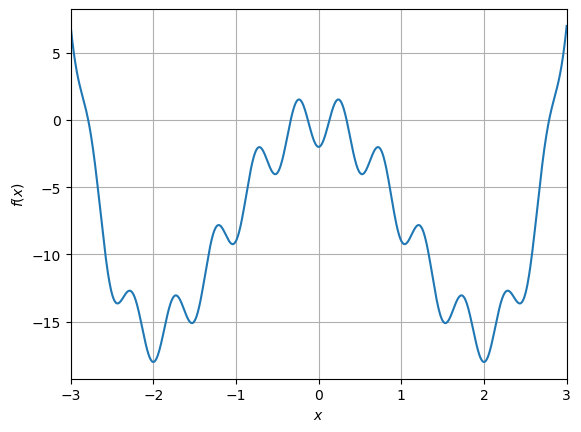

In [50]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

In [57]:
!pip --version

!pip install opencv-python-headless

pip 21.2.4 from C:\Users\Brian\anaconda3\lib\site-packages\pip (python 3.9)



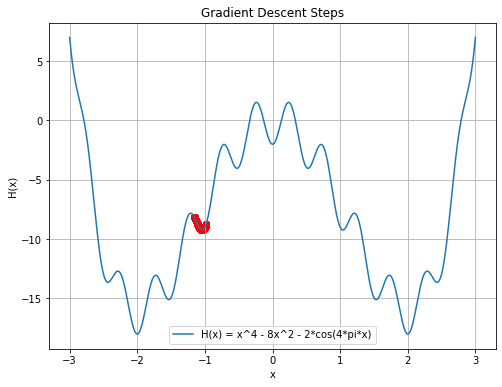

Starting from x = -1, the minimum value of H is -9.057321177136666 at x = -1.07830731911286


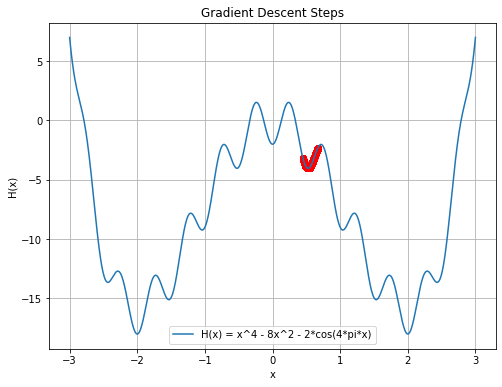

Starting from x = 0.5, the minimum value of H is -3.1991019384321513 at x = 0.45009604318015894


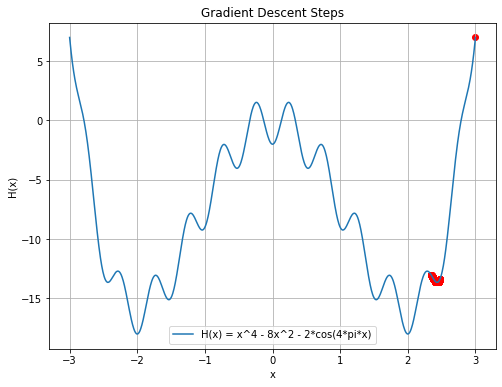

Starting from x = 3, the minimum value of H is -13.606618976572499 at x = 2.4502876966644473


In [71]:
import numpy as np
import matplotlib.pyplot as plt

def H(x):
    return x**4 - 8*x**2 - 2*np.cos(4*np.pi*x)

def dH_dx(x):
    return 4*x**3 - 16*x + 8*np.pi*np.sin(4*np.pi*x)

def gradient_descent_with_plot(gradient_func, initial_guess, learning_rate=0.01, iterations=1000, epsilon=1e-6):
    x = initial_guess
    x_steps = [x]
    
    for i in range(iterations):
        gradient = gradient_func(x)
        x_new = x - learning_rate * gradient
        
        if abs(x_new - x) < epsilon:
            break
        
        x = x_new
        x_steps.append(x)
    
    x_vals = np.linspace(-3, 3, 1000)
    plt.figure(figsize=(8,6))
    plt.plot(x_vals, H(x_vals), label='H(x) = x^4 - 8x^2 - 2*cos(4*pi*x)')
    plt.scatter(x_steps, H(np.array(x_steps)), color='red')
    plt.title('Gradient Descent Steps')
    plt.xlabel('x')
    plt.ylabel('H(x)')
    plt.legend()
    plt.grid(True)
    
    plt.savefig(f'gradient_descent_steps_{initial_guess}.png')
    plt.show()

    return x


initial_guesses = [-1, 0.5, 3]

for guess in initial_guesses:
    min_x = gradient_descent_with_plot(dH_dx, guess)
    min_value = H(min_x)
    print(f"Starting from x = {guess}, the minimum value of H is {min_value} at x = {min_x}")


In [70]:


'''--------------------Write your code below this line------------------------------'''

# import cv2
# import os

import numpy as np
import matplotlib.pyplot as plt
import os

def H(x):
    return x**4 - 8*x**2 - 2*np.cos(4*np.pi*x)

def dH_dx(x):
    return 4*x**3 - 16*x + 8*np.pi*np.sin(4*np.pi*x)

def gradient_descent_with_plot(gradient_func, initial_guess, learning_rate=0.01, iterations=1000, epsilon=1e-6):
    x = initial_guess
    x_steps = [x]
    
    for i in range(iterations):
        gradient = gradient_func(x)
        x_new = x - learning_rate * gradient
        
        if abs(x_new - x) < epsilon:
            break
        
        x = x_new
        x_steps.append(x)
        
        plt.figure(figsize=(8,6))
        x_vals = np.linspace(-3, 3, 1000)
        plt.plot(x_vals, H(x_vals), label='H(x) = x^4 - 8x^2 - 2*cos(4*pi*x)')
        plt.scatter(x_steps, H(np.array(x_steps)), color='red')
        plt.title(f'Gradient Descent Step {i+1}')
        plt.xlabel('x')
        plt.ylabel('H(x)')
        plt.legend()
        plt.grid(True)
        
        plt.savefig(f'gradient_descent_step_{initial_guess}_{i+1}.png')
        plt.close()
    
    return x

initial_guesses = [-1, 0.5, 3]

for guess in initial_guesses:
    min_x = gradient_descent_with_plot(dH_dx, guess)
    min_value = H(min_x)
    print(f"Starting from x = {guess}, the minimum value of H is {min_value} at x = {min_x}")
 














'''--------------------Write your code above this line------------------------------'''

Starting from x = -1, the minimum value of H is -9.057321177136666 at x = -1.07830731911286


KeyboardInterrupt: 

<Figure size 576x432 with 0 Axes>

The results are not consistent as this method is finding the locak minima for each intial guess and not the global minima. 

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

Initial Guess: -1, Estimated Minimums: [-3.1552865875646168, -2.6001795216250274, -2.5077952631369507, -2.436571473191982, -2.398895476076396]
Initial Guess: 0.5, Estimated Minimums: [-3.240734942783529, 0.5, 0.5, 0.5, 0.5]
Initial Guess: 3, Estimated Minimums: [-2.9858271128295915, 0.5637575492166002, 1.3715431649158774, 1.5463195002137013, 1.4079594665766368]


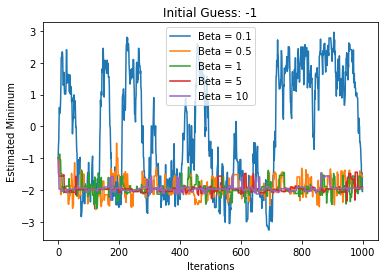

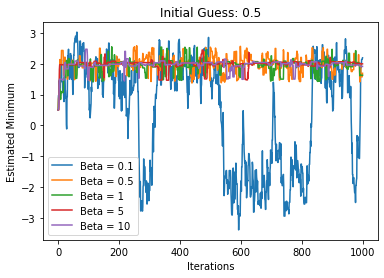

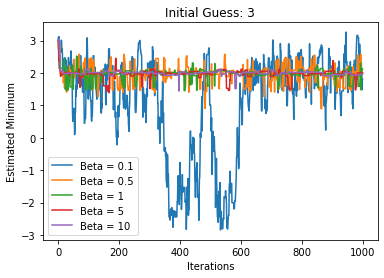

'--------------------Write your code above this line------------------------------'

In [81]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def H(x):
    return x**4 - 8 * x**2 - 2 * np.cos(4 * np.pi * x)

def noisy_phi4(x, noise_level=1):
    return H(x) + np.random.normal(0, noise_level)

def metropolis_hastings_beta(initial_x, iterations, proposal_sd, noise_level, beta):
    x = initial_x
    samples = [x]
    
    for i in range(iterations):
        x_new = np.random.normal(x, proposal_sd)
        acceptance_prob = min(1, np.exp(-(noisy_phi4(x_new, noise_level) - noisy_phi4(x, noise_level)) * beta))
    
        if np.random.rand() < acceptance_prob:
            x = x_new
        
        samples.append(x)
    return samples, min(samples) 

initial_guesses = [-1, 0.5, 3]
iterations = 1000
proposal_sd = 0.5
noise_level = 1
beta_values = [0.1, 0.5, 1, 5, 10]

estimated_mins = {}  

for initial_x in initial_guesses:
    min_values = []
    for beta in beta_values:
        samples, estimated_min = metropolis_hastings_beta(initial_x, iterations, proposal_sd, noise_level, beta)
        min_values.append(estimated_min)
    
    estimated_mins[initial_x] = min_values

for initial_x, min_values in estimated_mins.items():
    print(f"Initial Guess: {initial_x}, Estimated Minimums: {min_values}")

for initial_x in initial_guesses:
    plt.figure()
    plt.title(f'Initial Guess: {initial_x}')
    for beta, min_value in zip(beta_values, estimated_mins[initial_x]):
        samples, _ = metropolis_hastings_beta(initial_x, iterations, proposal_sd, noise_level, beta)
        plt.plot(samples, label=f"Beta = {beta}")

    plt.xlabel('Iterations')
    plt.ylabel('Estimated Minimum')
    plt.legend()
    plt.show()




'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

Initial Guess: -1, Estimated Minimum: -4.5787
Initial Guess: 0.5, Estimated Minimum: -15.6986
Initial Guess: 3, Estimated Minimum: -1.4290


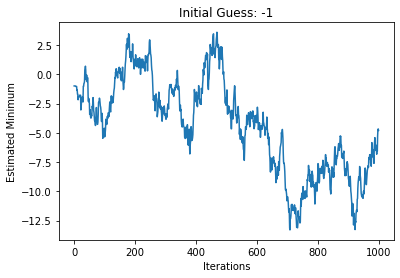

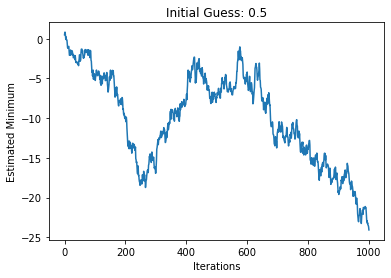

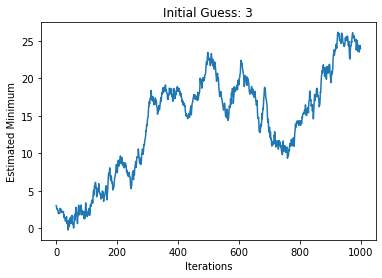

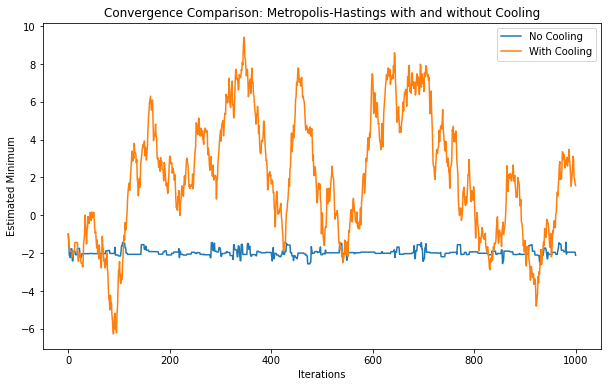

'--------------------Write your code above this line------------------------------'

In [91]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def H(x):
    return x**4 - 8 * x**2 - 2 * np.cos(4 * np.pi * x)

def noisy_phi4(x, noise_level=1):
    return H(x) + np.random.normal(0, noise_level)

def metropolis_hastings_no_cooling(initial_x, iterations, proposal_sd, noise_level, beta):
    x = initial_x
    samples = [x]
    
    for i in range(iterations):
        x_new = np.random.normal(x, proposal_sd)
        acceptance_prob = min(1, np.exp(-(noisy_phi4(x_new, noise_level) - noisy_phi4(x, noise_level)) * beta))
    
        if np.random.rand() < acceptance_prob:
            x = x_new
        
        samples.append(x)
    
    return samples


def metropolis_hastings_cooling(initial_x, iterations, proposal_sd, noise_level, beta_initial, cooling_factor):
    x = initial_x
    samples = [x]
    beta = beta_initial
    
    for i in range(iterations):
        x_new = np.random.normal(x, proposal_sd)
        acceptance_prob = np.exp(-(noisy_phi4(x_new, noise_level) - noisy_phi4(x, noise_level)) * beta)
        
        if np.random.rand() < acceptance_prob:
            x = x_new
        
        samples.append(x)
        beta *= cooling_factor 
    
    return samples


initial_guesses = [-1, 0.5, 3]
iterations = 1000
proposal_sd = 0.5
noise_level = 1
beta_initial = 1.0
cooling_factor = 0.9

estimated_mins = {}

for initial_x in initial_guesses:
    samples = metropolis_hastings_cooling(initial_x, iterations, proposal_sd, noise_level, beta_initial, cooling_factor)
    estimated_min = min(samples)
    estimated_mins[initial_x] = estimated_min

for initial_x, min_value in estimated_mins.items():
    print(f"Initial Guess: {initial_x}, Estimated Minimum: {min_value:.4f}")

for initial_x in initial_guesses:
    plt.figure()
    plt.title(f'Initial Guess: {initial_x}')
    samples = metropolis_hastings_cooling(initial_x, iterations, proposal_sd, noise_level, beta_initial, cooling_factor)
    plt.plot(samples)

    plt.xlabel('Iterations')
    plt.ylabel('Estimated Minimum')
    plt.show()

samples_no_cooling = metropolis_hastings_no_cooling(initial_guesses[0], iterations, proposal_sd, noise_level, beta_initial)

samples_cooling = metropolis_hastings_cooling(initial_guesses[0], iterations, proposal_sd, noise_level, beta_initial, cooling_factor)

plt.figure(figsize=(10, 6))
plt.plot(samples_no_cooling, label='No Cooling')
plt.plot(samples_cooling, label='With Cooling')
plt.xlabel('Iterations')
plt.ylabel('Estimated Minimum')
plt.title('Convergence Comparison: Metropolis-Hastings with and without Cooling')
plt.legend()
plt.show()



'''--------------------Write your code above this line------------------------------'''